# Paquetes

In [66]:
import numpy as np   

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
import pandas as pd    

import matplotlib.pyplot as plt   
import seaborn as sns

In [67]:
mpg_df = pd.read_csv("./auto-mpg.csv")

In [68]:
mpg_df.head() #muestra de 5 registros

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Ejercicio

### Predecir el consumo de combustible en millas por galón (MPG) durante un ciclo urbano (es decir, la eficiencia de combustible de un vehículo mientras se conduce en una ciudad)

In [69]:
mpg_df.info() #información sobre los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


** Para construir un modelo de machine learning, debemos revisar que todas las variables numéricas están bien representadas. Note que "horsepower" y "car name" tienen tipo de dato "object"**

**El nombre del carro no agrega ningún valor al modelo por lo que podemos eliminarlo**

**Debemos revisar por qué caballos de fuerza (horsepower) no lo detecta como una columna numérica**

In [70]:
mpg_df[mpg_df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


**Podemos ver que hay 6 valores que tienen "?" . Podemos reemplazarlos con valores nulos**

In [71]:
mpg_df=mpg_df.replace('?',np.nan)

In [72]:
mpg_df=mpg_df.drop('car name',axis=1)

In [73]:
mpg_df=mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [74]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


# Separar variables dependientes e independientes

In [75]:
#'mpg' es la variable dependiente, eliminarla de las variables dependientes
X = mpg_df.drop('mpg', axis=1).astype("float")

#Copia la columna 'mpg' sola, pues es la variable dependiente
y = mpg_df[['mpg']]


# Distribución de Variables independientes

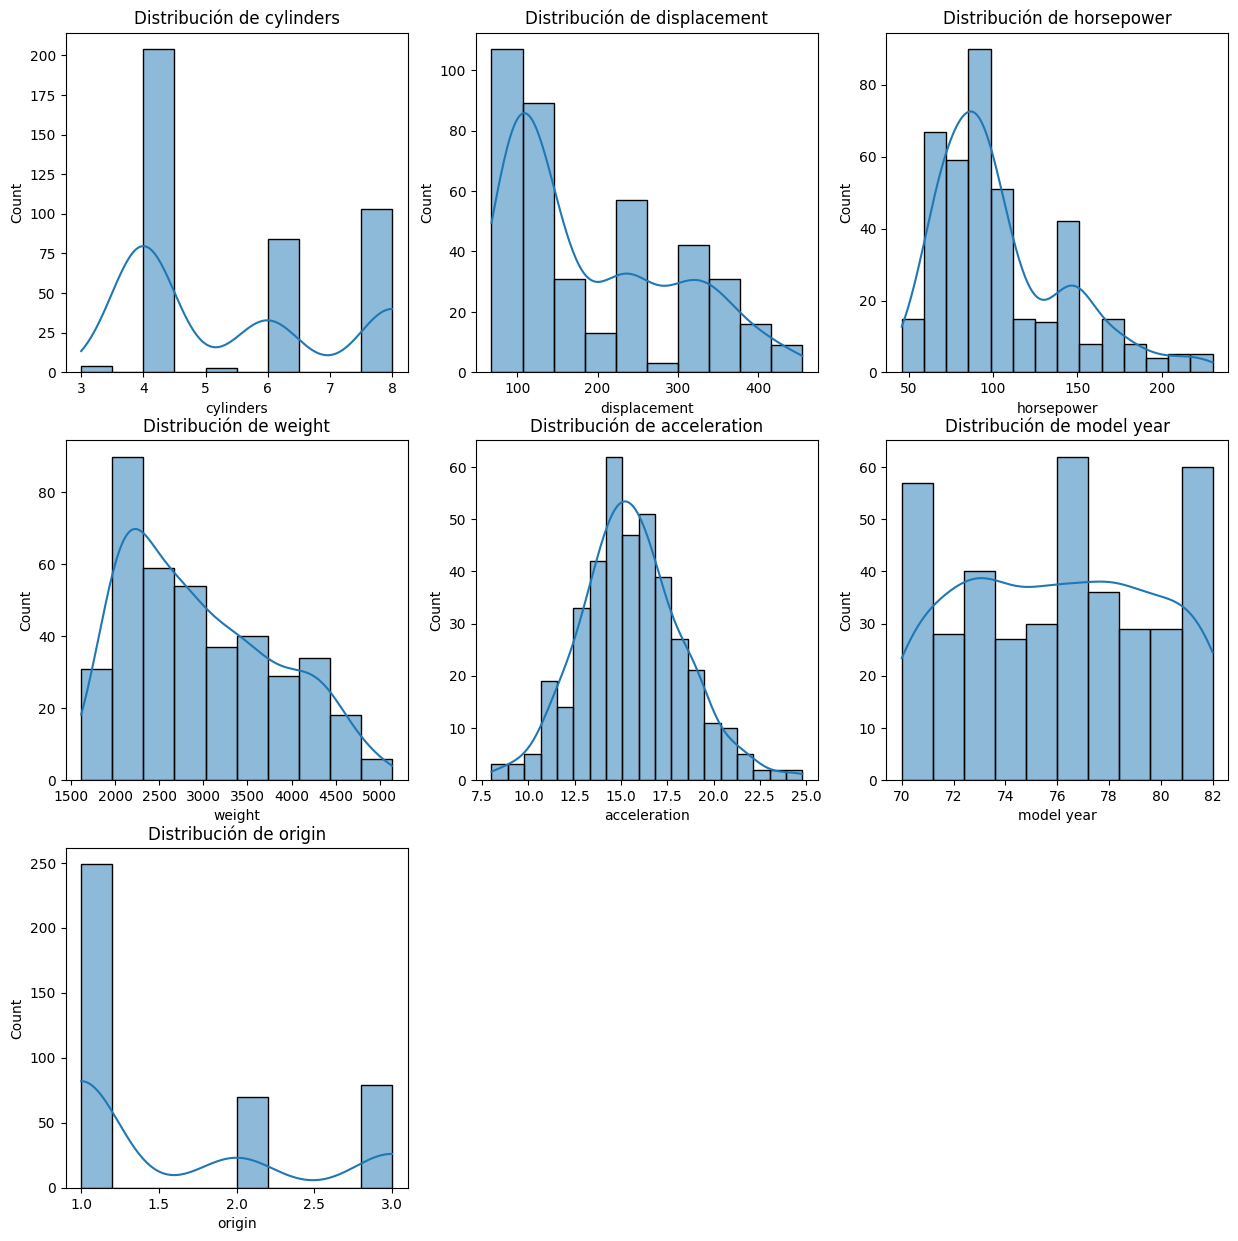

In [76]:
# Número de variables
n_vars = len(X.columns)

# Crear una figura con subplots: 3 filas y 3 columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Aplanar el array de ejes para iterar más fácilmente
axes = axes.flatten()

# Graficar cada variable en un subplot
for i, (ax, column) in enumerate(zip(axes, X.columns)):
    sns.histplot(X[column], kde=True, ax=ax)
    ax.set_title(f'Distribución de {column}')

# Eliminar ejes vacíos si hay más subplots de los necesarios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

**"displacement","horsepower","weight" columnas tienen asimetría positiva**

**"acceleration"se distribuye normalmente**

**"model year" parece normal con amplitud**

**"cylinders" tiene valores específicos que se repiten bastante**

**origin 1 es más comparado que los otros**



# Distribución de variable dependiente

<Axes: xlabel='mpg', ylabel='Count'>

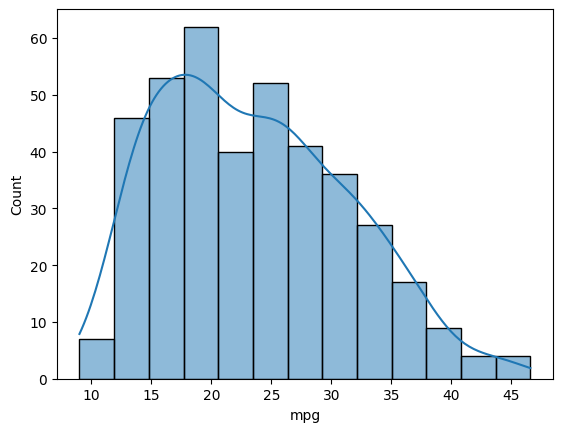

In [77]:
sns.histplot(y['mpg'], kde=True)

**Pequeña asimetría positiva (hacia la derecha)**

In [78]:
from sklearn.preprocessing import StandardScaler
estandarizador = StandardScaler()
estandarizador.fit(X.loc[:])
X.loc[:] = estandarizador.transform(X.loc[:])

In [79]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Regresión lineal

In [80]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("El coeficiente para {} es {}".format(col_name, regression_model.coef_[0][idx]))

El coeficiente para cylinders es -0.4729063660417347
El coeficiente para displacement es 1.8680965351111951
El coeficiente para horsepower es -0.6068096458332478
El coeficiente para weight es -5.674923529213638
El coeficiente para acceleration es 0.2979856433283217
El coeficiente para model year es 2.9312409979100544
El coeficiente para origin es 1.0685755174599958


**Here the coeficient values are relatively smaller. So we can say this is the smoother model.**

In [81]:
intercept = regression_model.intercept_[0]

print("El intercepto del modelo es {}".format(intercept))

El intercepto del modelo es 23.507002873795237


# Regularized Ridge Model 

In [82]:
ridge = Ridge(alpha=.3) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Modelo Ridge: Coeficiente para {} es {}".format(col,ridge.coef_[0][i]))

Modelo Ridge: Coeficiente para cylinders es -0.45439831846742523
Modelo Ridge: Coeficiente para displacement es 1.7913565700414005
Modelo Ridge: Coeficiente para horsepower es -0.6186616245529789
Modelo Ridge: Coeficiente para weight es -5.6151425052353625
Modelo Ridge: Coeficiente para acceleration es 0.28567730781239636
Modelo Ridge: Coeficiente para model year es 2.9244846118404095
Modelo Ridge: Coeficiente para origin es 1.0640203145329086


# Regularized LASSO Model

In [83]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Modelo Lasso: Coeficiente para {} es {}:".format(col,lasso.coef_[i]))

Modelo Lasso: Coeficiente para cylinders es -0.0:
Modelo Lasso: Coeficiente para displacement es 0.0:
Modelo Lasso: Coeficiente para horsepower es -0.3346917149019299:
Modelo Lasso: Coeficiente para weight es -4.804343765341972:
Modelo Lasso: Coeficiente para acceleration es 0.07413802599856768:
Modelo Lasso: Coeficiente para model year es 2.8042052642372886:
Modelo Lasso: Coeficiente para origin es 0.7832616753738505:


## Comparar R²

In [84]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.8102052299899135
0.8641210527455936


In [85]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8101975946311711
0.8641116185607699


In [86]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8066763358978397
0.8631912428713555


# Usar Polinomios

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
poly = PolynomialFeatures(degree = 4, interaction_only=True)

In [89]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 99)

# Simple non regularized linear model on poly features-

In [90]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[-3.96660532e-11 -6.60236945e-01 -6.44440804e+00 -4.52420242e+00
  5.49819653e+00  2.63319296e+00 -2.84556399e+00 -4.10958191e+00
 -1.13710690e+00  1.12938361e+01 -2.81445816e-01  1.25758167e+01
 -3.46009523e+00  1.32368439e-02 -9.16121759e+00  2.10723971e+01
 -1.88574643e+00 -5.06057944e-01 -9.05458971e+00  4.44595041e+00
 -2.12069958e+00 -1.14421381e+01 -2.19987195e+00 -3.30812946e+00
  4.25816466e+00  1.05957105e+01 -6.38893691e+00  3.59648268e+00
 -4.29090628e+00  4.46213458e+00  6.11884993e+00  1.17254584e+01
  8.56478208e-01 -4.36644007e+00  5.24779361e+00 -3.52078988e+00
 -3.21851614e+00  7.71922285e+00 -6.91706226e+00 -1.69623745e+00
  2.97332151e+00 -3.19911476e+00  9.31253985e+00 -2.16580942e+00
  3.83503162e+00 -1.13825320e+00 -1.30614273e+01  2.18070436e-01
 -1.14606618e+00  4.51763988e+00  2.11003461e+01 -5.97403273e+00
  1.18745441e+01 -1.10549121e+01  4.13360662e+00  4.94025245e+00
  1.84209093e+00 -1.53157184e+00 -4.74316566e+00 -1.58597371e+01
  2.60727287e+00 -5.31867

In [91]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.9438181857709599
0.6933126550976572


# Regularized Ridge Model

In [146]:
ridge = Ridge(alpha=1.99)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00 -1.10213947e+00 -7.81577212e-01 -2.25771708e+00
  -2.93744338e+00 -1.35621976e+00  1.01121867e+00 -7.58555024e-01
   8.04927664e-02 -3.68560865e-02  1.16313558e+00  9.39156431e-01
  -9.65373434e-01  1.82472690e-01  2.58202374e-01  2.00415657e+00
  -2.96282358e-01  2.29524162e+00 -1.51404430e-01 -2.51962611e-01
   3.46903164e-01 -5.48307012e-01 -4.71750578e-01  8.96591708e-01
  -3.28458764e-01 -4.72638776e-01  2.63646880e-01 -3.94102114e-01
  -1.47499620e-01 -3.97976671e-01 -1.45517124e+00  1.06129148e+00
   1.28672358e+00 -1.15322754e+00  9.39897600e-01 -3.40934436e-01
   1.01597995e+00  5.15568481e-01 -4.71632937e-01 -1.08883989e-03
  -5.31427236e-01  5.47583410e-01  2.24141950e-01 -1.67116422e-01
   8.05995979e-01  5.46070215e-01 -7.14426658e-01  1.40686376e+00
   9.12652687e-01  4.26765088e-01  1.39833082e+00  1.29534631e-01
   4.27804847e-01 -1.88236659e+00  5.20183869e-01  6.54436572e-01
  -9.55248083e-01 -1.49513917e+00 -1.37528073e+00  1.27629149e-

In [147]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.9305279534789896
0.8262890347420543


# Regularized Lasso Model

In [150]:
lasso = Lasso(alpha=0.04)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.         -0.37901534 -0.         -1.68498783 -4.45214725 -0.65180688
  1.75380449  0.         -0.          0.          0.93450875  0.02058749
 -0.          0.          0.          1.52460686  0.          0.
  0.          0.         -0.         -1.58685771 -0.          0.
 -0.         -0.          0.         -0.         -0.         -0.36306985
 -0.05679969  0.          0.70551923 -0.         -0.         -0.
  0.          0.         -0.          0.         -0.          0.296085
 -0.33250052 -0.         -0.          0.          0.          0.
  0.          0.          0.          0.4581301  -0.         -0.47817871
 -0.          0.         -0.         -1.08602293 -1.29792166 -0.
  0.19701899  0.24988988  0.         -0.35741273  0.         -0.07047063
 -0.         -0.          0.          0.          0.62525826  0.
  0.          0.         -0.28413032  0.         -0.          0.14692749
  0.          0.         -0.          0.         -0.         -0.
 -0.19143389  0.1117633

In [151]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.9089339918715351
0.8562976670287069


# Búsqueda del hiperparámetro $\alpha$

In [139]:
from sklearn.model_selection import GridSearchCV

In [142]:
10**(.3)

1.9952623149688795

In [148]:
busqueda_cuadricula = GridSearchCV(Lasso(),param_grid={'alpha':np.logspace(-3,.3,50)},scoring='neg_mean_absolute_percentage_error')
busqueda_cuadricula.fit(X_train,y_train)

/home/danielaguirre/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.087e+02, tolerance: 1.327e+00
  model = cd_fast.enet_coordinate_descent(
/home/danielaguirre/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.138e+02, tolerance: 1.276e+00
  model = cd_fast.enet_coordinate_descent(
/home/danielaguirre/miniconda3/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.16774210e-03, 1.36362162e-03, 1.59235837e-03,
       1.85946392e-03, 2.17137430e-03, 2.53560519e-03, 2.96093294e-03,
       3.45760606e-03, 4.03759217e-03, 4.71486636e-03, 5.50574796e-03,
       6.42929370e-03, 7.50775694e-03, 8.76712387e-03, 1.02377397e-02,
       1.19550396e-02, 1.39604031e-02, 1.63021505e-02, 1.90367...
       7.68624610e-02, 8.97555318e-02, 1.04811313e-01, 1.22392583e-01,
       1.42922973e-01, 1.66897173e-01, 1.94892855e-01, 2.27584593e-01,
       2.65760111e-01, 3.10339270e-01, 3.62396232e-01, 4.23185338e-01,
       4.94171336e-01, 5.77064675e-01, 6.73862717e-01, 7.86897866e-01,
       9.18893768e-01, 1.07303094e+00, 1.25302341e+00, 1.46320819e+00,
       1.70864980e+00, 1.99526231e+00])},
             scoring='neg_mean_absolute_percentage_error')

In [149]:
busqueda_cuadricula.best_estimator_

Lasso(alpha=0.041335817452924355)